In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

result_path="/home/emartini/nas/MAEVE/dataset/panoptic-toolbox/results/"
filenames = ["2025_01_23_11_01_160422_ultimatum1_V3.csv",
             "2025_01_23_14_01_170407_haggling_a1_V3.csv",
             "2025_01_23_10_01_161029_build1_V3.csv",
             "2025_01_23_10_01_161029_tools1_V3.csv",
             "2025_01_23_10_01_170915_office1_V3.csv"]

dfs = [pd.read_csv(os.path.join(result_path,filename)) for filename in filenames]
DF = pd.concat(dfs)
# print(df[["Cams", "Aggregator", "LocA", "DetA", "AssA","HOTA"]].to_string())
# DF.groupby(["Aggregator","#Cams"]).mean()
# DF.groupby(["#Cams","Aggregator"]).mean()
cam_grouped = DF.groupby(["Aggregator","#Cams"]).mean()
cam_grouped

#People       LocA       DetA      DetPR      DetRE  \
Aggregator #Cams                                                         
befine     1      3.190476  79.338095  45.157143  62.590476  57.885714   
           2      3.250000  83.592500  65.242500  80.450000  76.580000   
           3      3.250000  85.242500  68.135000  80.317500  81.787500   
           4      3.250000  85.900000  65.510000  77.035000  82.160000   
           5      3.250000  86.225000  62.850000  74.150000  82.200000   
cometh     1      3.190476  80.071429  51.180952  70.509524  62.509524   
           2      3.250000  82.670000  66.757500  79.055000  79.730000   
           3      3.250000  85.365000  73.580000  82.570000  87.592500   
           4      3.250000  86.845000  74.645000  82.150000  90.495000   
           5      3.250000  87.575000  71.725000  78.750000  90.725000   

                       AssA      AssPR      AssRE       HOTA  
Aggregator #Cams                                              
befine     1      21.547619  26.300000  49.485714  28.480952  
           2      29.492500  32.387500  57.582500  38.590000  
           3      32.025000  33.887500  59.057500  40.127500  
           4      32.400000  33.955000  58.915000  38.985000  
           5      32.600000  34.000000  59.450000  37.825000  
cometh     1      54.157143  81.309524  60.614286  51.661905  
           2      75.475000  88.450000  82.022500  70.557500  
           3      86.350000  94.095000  90.717500  79.217500  
           4      90.470000  96.315000  93.570000  81.570000  
           5      90.075000  96.700000  92.825000  79.475000

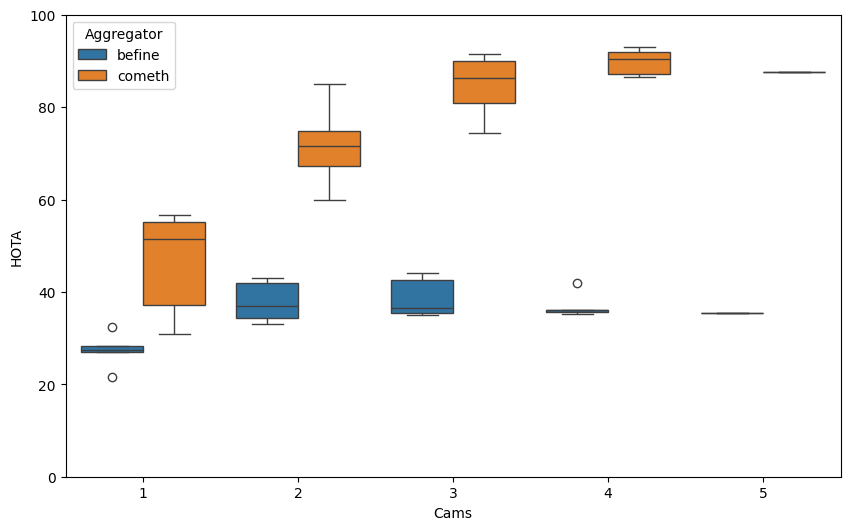

In [ ]:

#.unstack().boxplot(column="HOTA",by="Aggregator",title="HOTA",ylim=(0,100))
# cam_grouped["HOTA"].unstack().plot(kind='bar',title="HOTA",ylim=(0,100))
# cam_grouped["DetA"].unstack().plot(kind='bar',title="DetA",ylim=(0,100))
# cam_grouped["AssA"].unstack().plot(kind='bar',title="AssA",ylim=(0,100))
# cam_grouped["LocA"].unstack().plot(kind='bar',title="LocA",ylim=(0,100))
# DF[["Aggregator","#Cams","HOTA"]].groupby(["Aggregator","#Cams"]).min()
plt.figure(figsize=(10, 6))
sns.boxplot(x='#Cams', y='HOTA', hue='Aggregator',  data=DF)
# plt.title('Boxplot of HOTA by #Cams')
plt.xlabel('Cams')
plt.ylabel('HOTA')
plt.ylim(0,100)
plt.show()

In [ ]:
# OLD
# Build qualitative json method vs ground truth (matching based on frame_id)
import collections
result = collections.Counter(list(DUT.keys())) & collections.Counter(list(GT.keys()))
intersected_list = list(result.elements())
# print(DUT.keys())
out = []
for i in intersected_list:
    f_gt = GT[i]
    f_dut = DUT[i]
    summed = f_gt.copy()
    summed["kp3d"] += f_dut["kp3d"]
    summed["kp2d"] += f_dut["kp2d"]
    summed["continuousState"] += f_dut["continuousState"]
    summed["track_ids"] += [id + 50 for id in f_dut["track_ids"]]
    # print(summed)
    # print(f_gt["timestamp"],f_dut["timestamp"])
    out.append(summed)
    # break

# dump json
filename = os.path.join(data_path,sequence_name+".gt_vs_"+method+"." +".".join(map(str, cameras))+".json")
print("Written",filename)

with open(filename, "w") as outfile:
    json.dump(out, outfile)

# Export in viewer format
os.system('python3 to_viewer.py ' + filename + ' --rotation 180 --output '+filename.replace('.json','.viewer.json')+' >> "tmp/"$1"_log_2.txt"')

In [ ]:
# OLD
# Build qualitative json method vs ground truth (matching based on timestamps)
GT_t = {}
for frame in list(GT.keys()):
    GT_t[GT[frame]["timestamp"]] = GT[frame]

DUT_t = {}
for frame in list(DUT.keys()):
    DUT_t[DUT[frame]["timestamp"]] = DUT[frame]
          
import collections
result = collections.Counter(list(DUT_t.keys())) & collections.Counter(list(DUT_t.keys()))
intersected_list = list(result.elements())
# print(DUT.keys())
intersected_list.remove(0)
out = []
for i in intersected_list:
    print(i)
    summed = {}
    f_gt = GT_t[i]
    f_dut = DUT_t[i]
    # summed = f_gt.copy()
    summed["timestamp"] = f_gt["timestamp"]
    summed["frame_id"] = f_gt["frame_id"]
    summed["kp3d"] = f_gt["kp3d"]+f_dut["kp3d"]
    summed["kp2d"] = f_gt["kp2d"]+f_dut["kp2d"]
    summed["continuousState"] = f_gt["continuousState"]+f_dut["continuousState"]
    summed["track_ids"] = f_gt["track_ids"]+ [id + 50 for id in f_dut["track_ids"]]

    out.append(summed)

# dump json
filename = os.path.join(data_path,sequence_name+".gt_vs_"+method+"." +".".join(map(str, cameras))+".json")

with open(filename, "w") as outfile:
    json.dump(out, outfile)

# Export in viewer format
os.system('python3 to_viewer.py ' + filename + ' --rotation 180 --output '+filename.replace('.json','.viewer.json')+' >> "tmp/"$1"_log_2.txt"')